In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the adult dataset

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df.duplicated().sum()

52

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [9]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Exploratory Data Analysis

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
num_cols = df.select_dtypes('number')
cat_cols = df.drop(columns=df.select_dtypes('number').columns.tolist())

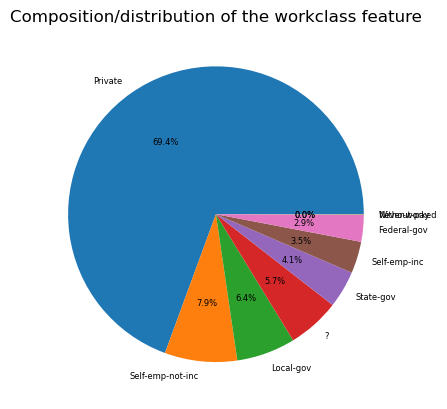

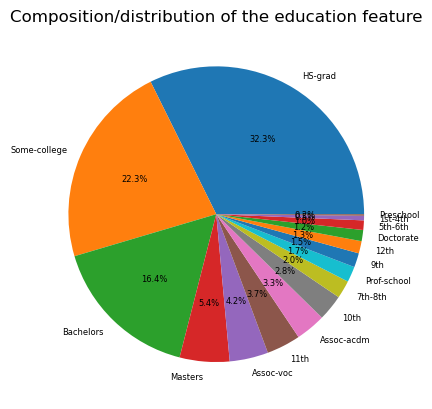

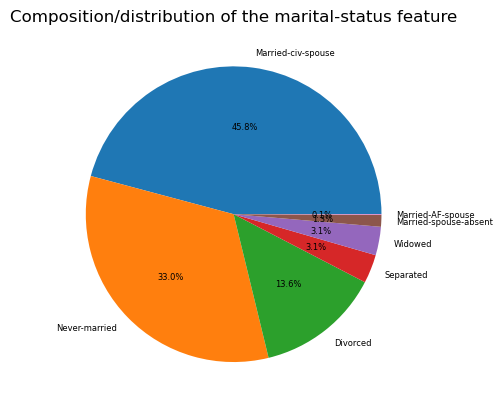

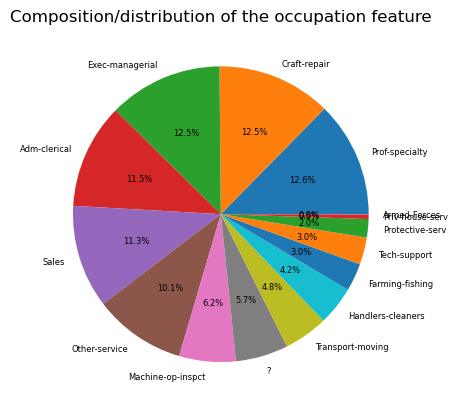

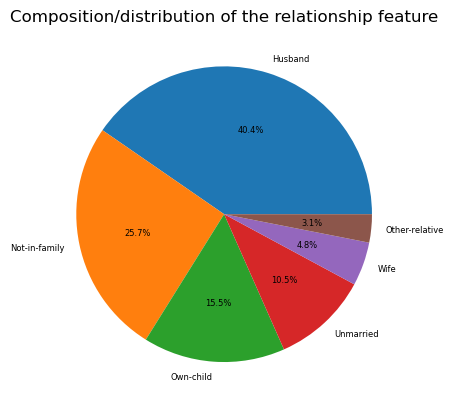

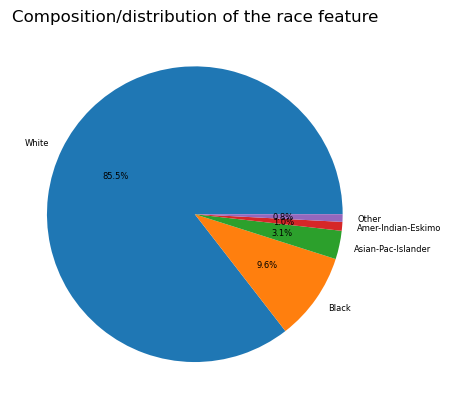

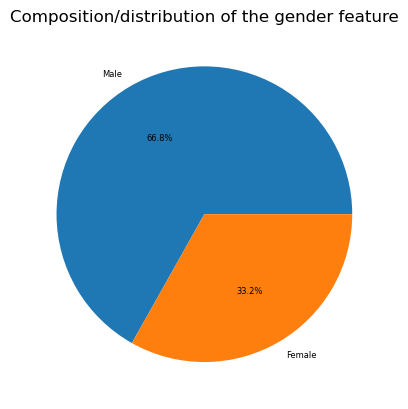

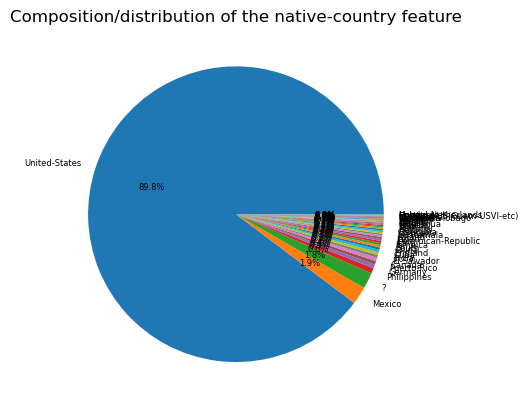

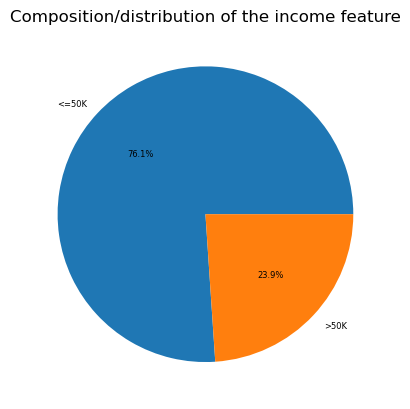

In [12]:
for i in cat_cols.columns:
    df[i].value_counts().plot.pie(autopct="%1.1f%%",fontsize=6)
    plt.title(f'Composition/distribution of the {i} feature')
    plt.ylabel('')
    plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


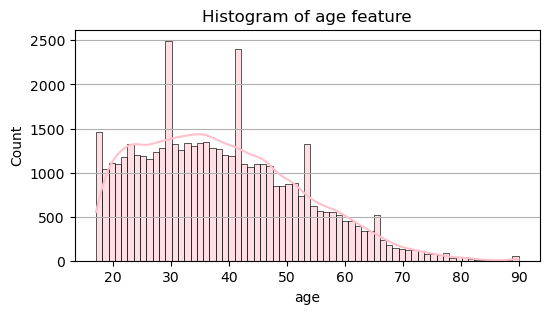

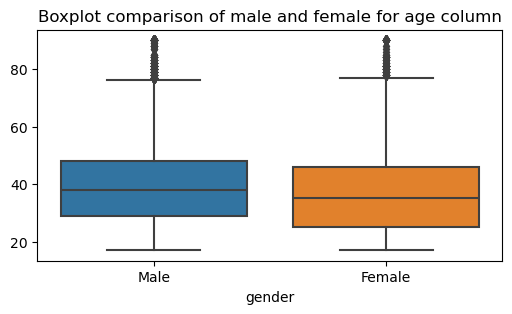

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


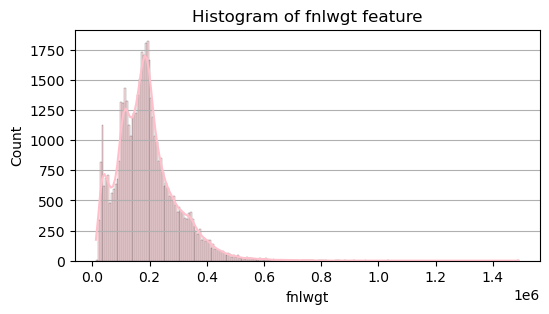

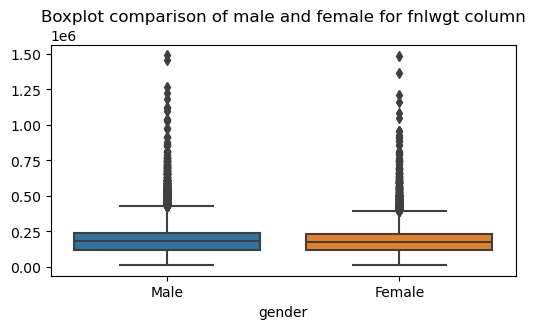

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


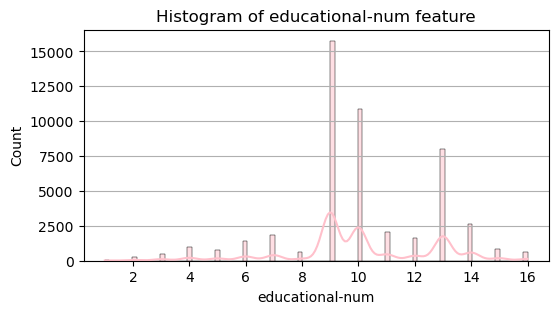

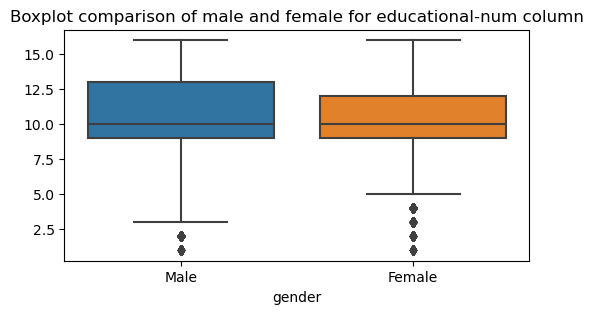

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


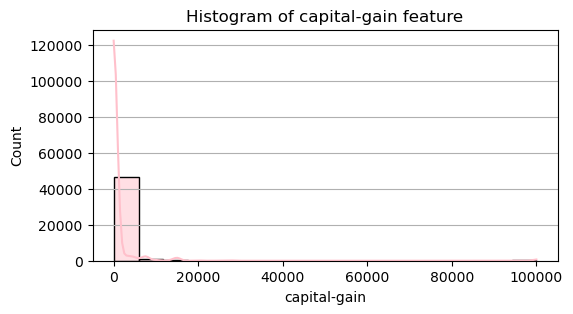

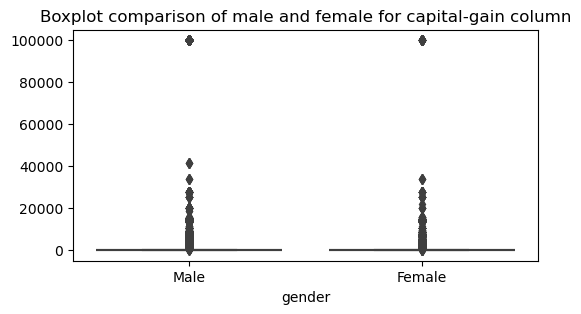

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


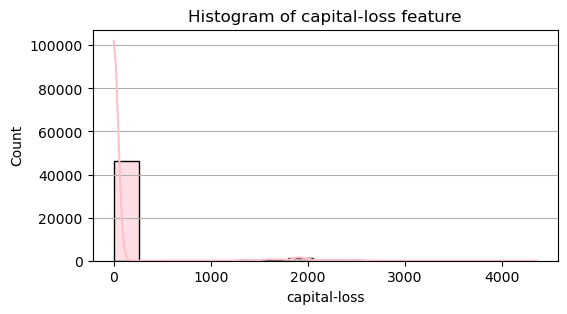

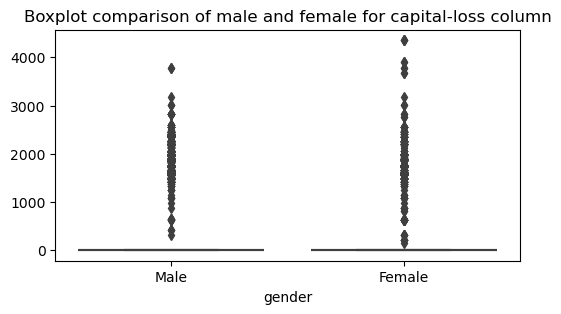

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


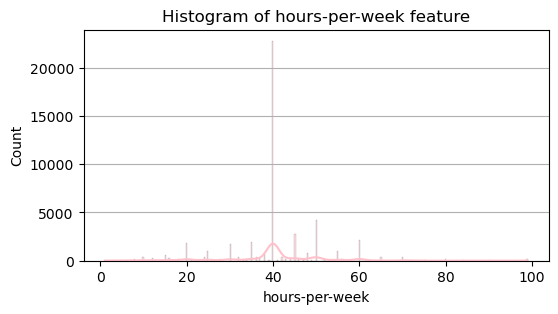

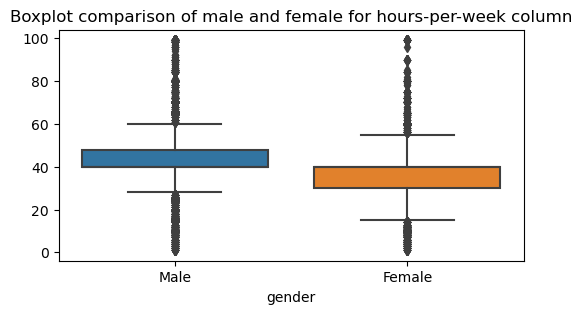

In [13]:
for i in num_cols.columns:
    plt.figure(figsize=(6,3))
    sns.histplot(df[i],kde=True,color='pink')
    plt.title(f"Histogram of {i} feature")
    plt.grid(axis='y')
    plt.show()
    
    plt.figure(figsize=(6,3))
    sns.boxplot(y=df[i],x=df['gender'])
    plt.title(f'Boxplot comparison of male and female for {i} column')
    plt.ylabel('')
    plt.show()

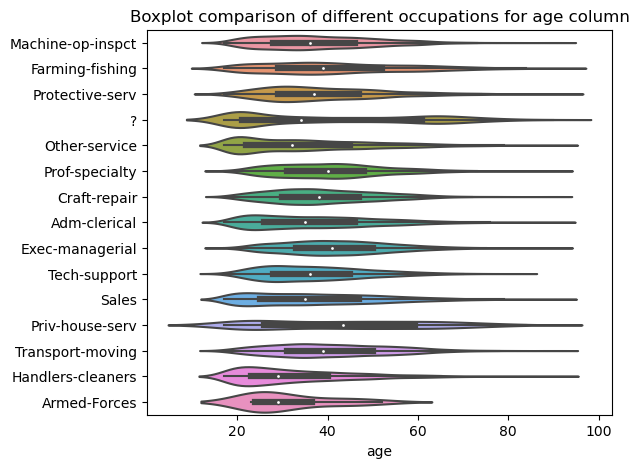

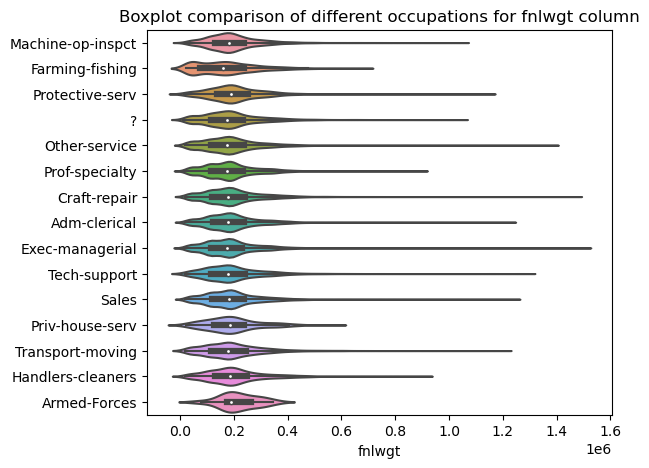

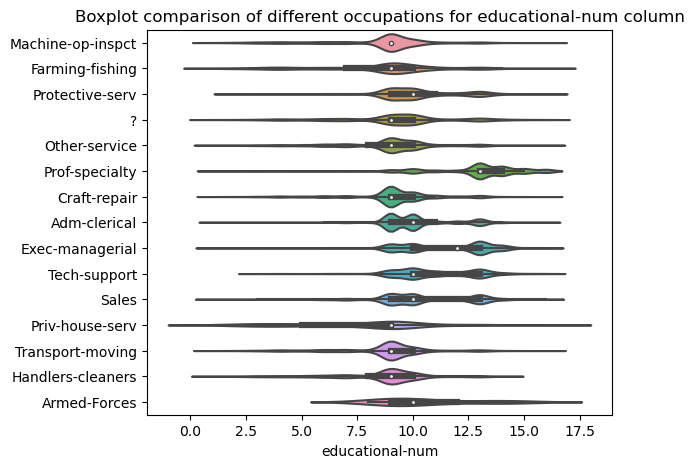

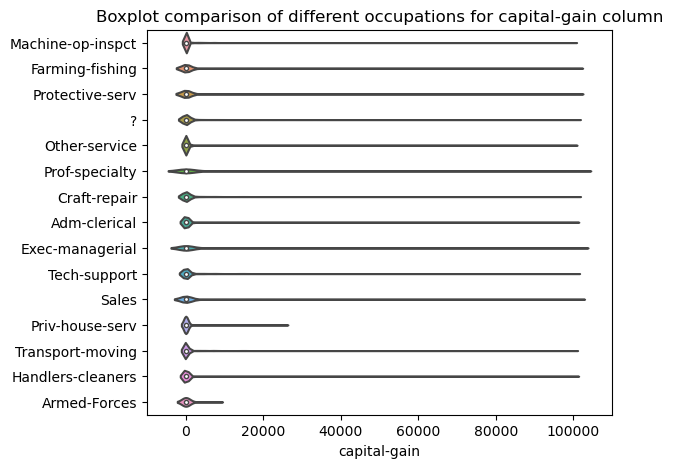

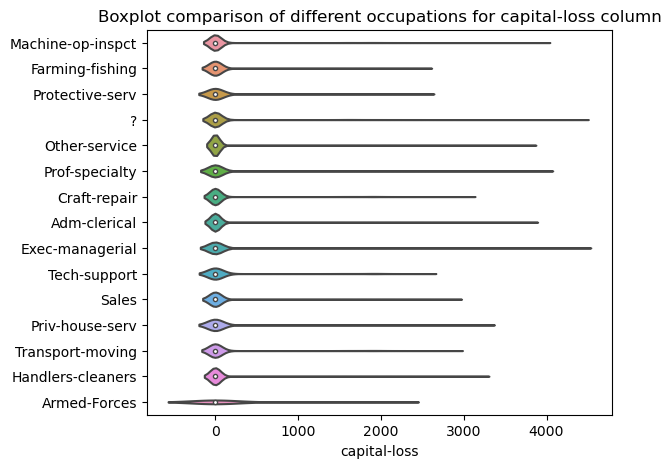

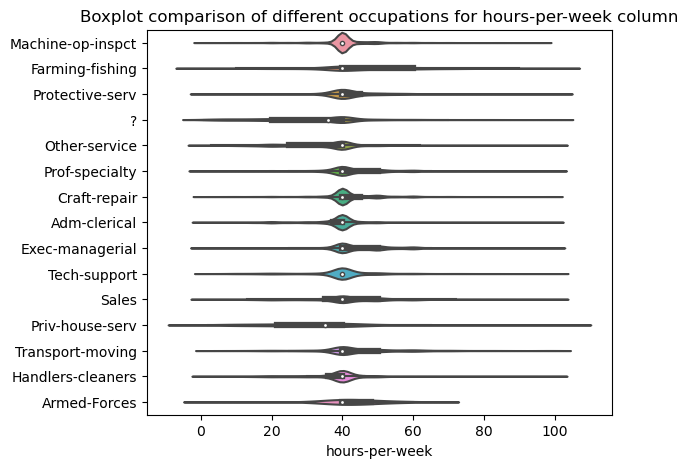

In [14]:
for i in num_cols.columns:
    plt.figure(figsize=(6,5))
    sns.violinplot(x=df[i],y=df['occupation'])
    plt.title(f'Boxplot comparison of different occupations for {i} column')
    plt.ylabel('')
    plt.show()

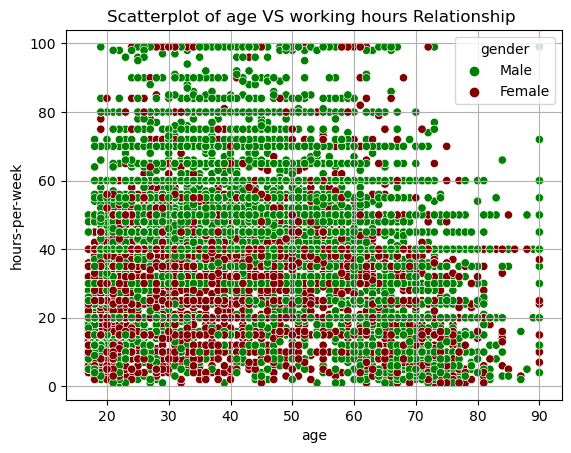

In [15]:
sns.scatterplot(x=df['age'],y=df['hours-per-week'],hue=df['gender'],
                palette={'Male': 'green', 'Female': 'maroon'},marker='o')
plt.title(f'Scatterplot of age VS working hours Relationship ')
plt.grid()
plt.show()

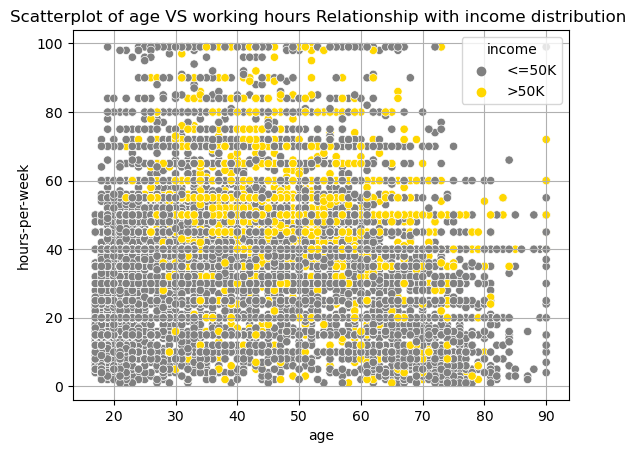

In [16]:
sns.scatterplot(x=df['age'],y=df['hours-per-week'],hue=df['income'],
                palette={'<=50K': 'grey', '>50K': 'gold'},marker='o')
plt.title(f'Scatterplot of age VS working hours Relationship with income distribution ')
plt.grid()
plt.show()

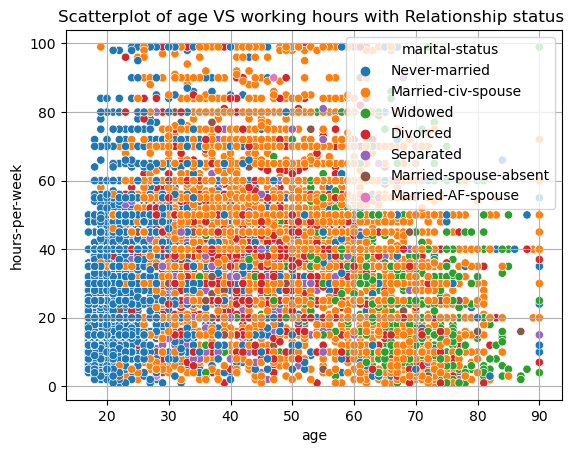

In [17]:
sns.scatterplot(x=df['age'],y=df['hours-per-week'],hue=df['marital-status'])
plt.title(f'Scatterplot of age VS working hours with Relationship status ')
plt.grid()
plt.show()

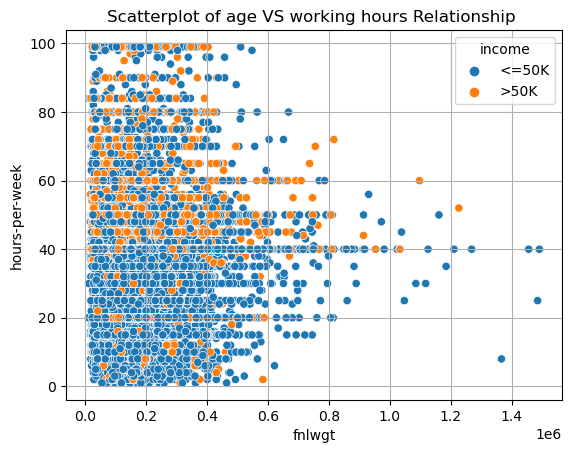

In [18]:
sns.scatterplot(x=df['fnlwgt'],y=df['hours-per-week'],hue=df['income'])
plt.title(f'Scatterplot of age VS working hours Relationship ')
plt.grid()
plt.show()

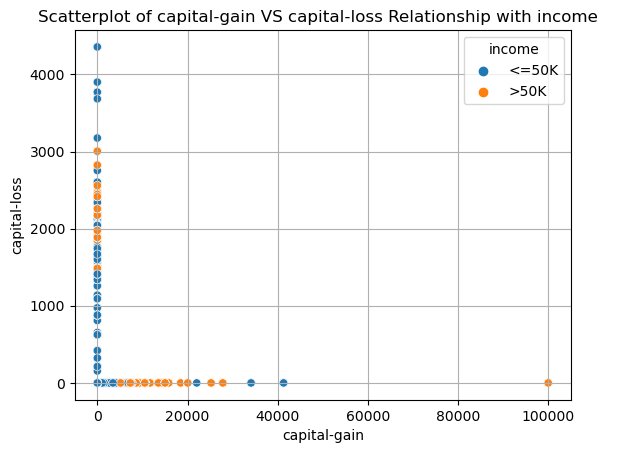

In [19]:
sns.scatterplot(x=df['capital-gain'],y=df['capital-loss'],hue=df['income'])
plt.title(f'Scatterplot of capital-gain VS capital-loss Relationship with income  ')
plt.grid()
plt.show()

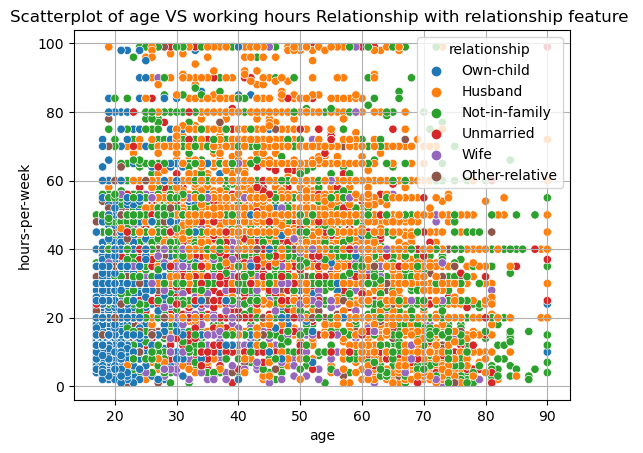

In [20]:
sns.scatterplot(x=df['age'],y=df['hours-per-week'],hue=df['relationship'],
                marker='o')
plt.title(f'Scatterplot of age VS working hours Relationship with relationship feature ')
plt.grid()
plt.show()

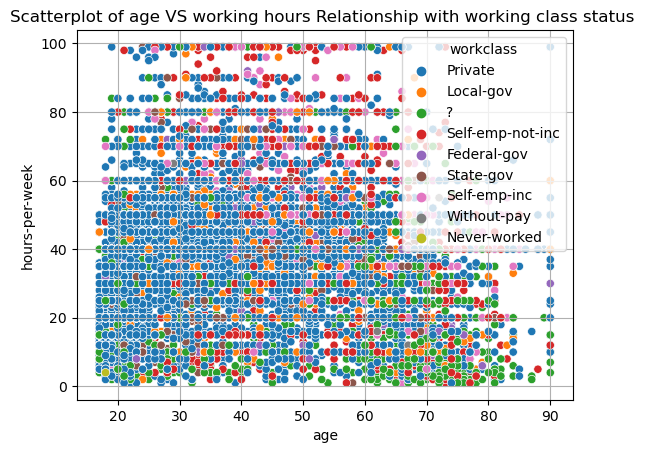

In [21]:
sns.scatterplot(x=df['age'],y=df['hours-per-week'],hue=df['workclass'],
                marker='o')
plt.title(f'Scatterplot of age VS working hours Relationship with working class status ')
plt.grid()
plt.show()

### Preprocessing

In [22]:
data1 = df.copy()
data2 = df.copy()

from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split

#### label encoding 

In [23]:
for i in cat_cols.iloc[:,:-1].columns:
    le = LabelEncoder()
    data1[i] = le.fit_transform(data1[i])
    print(f"{i} feature has been labelly encoded")
    
x = data1.drop(columns=['income']) 
y = data1['income']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
    
ss = StandardScaler()
x_train_le = ss.fit_transform(x_train)
x_test_le = ss.transform(x_test)

print('shape of x_train',x_train_le.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',x_test_le.shape)
print('shape of y_test',y_test.shape)

workclass feature has been labelly encoded
education feature has been labelly encoded
marital-status feature has been labelly encoded
occupation feature has been labelly encoded
relationship feature has been labelly encoded
race feature has been labelly encoded
gender feature has been labelly encoded
native-country feature has been labelly encoded
shape of x_train (34153, 14)
shape of y_train (34153,)
shape of x_test (14637, 14)
shape of y_test (14637,)


#### One Hot Encoding + Label Encoding

In [24]:
print('shape of original dataframe = ',data2.shape)

le = LabelEncoder()
data2['gender'] = le.fit_transform(data2['gender'])
print('gender labelly encoded')

empty_df = pd.DataFrame()

for i in cat_cols.drop(columns=['gender','income']).columns:
    dframe = pd.get_dummies(data2[i],prefix=i)
    empty_df = pd.concat([empty_df,dframe],axis=1)
    print(f"{i} has been one hot encoded")
    print(f'shape of empty_df after concatenating {i} is {empty_df.shape}')
    
print(f'final shape of concatenated dummies dataframe is {empty_df.shape} ')
    
data2 = data2.drop(columns=cat_cols.drop(columns=['gender','income']).columns)    
data2 = pd.concat([data2,empty_df],axis=1) 

print(f'shape of new one hot encoded dataframe = ' , data2.shape)

x = data2.drop(columns=['income'])
y = data2['income']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

ss = StandardScaler()
x_train_ohe = ss.fit_transform(x_train)
x_test_ohe = ss.transform(x_test)
    
print('shape of x_train',x_train_ohe.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',x_test_ohe.shape)
print('shape of y_test',y_test.shape)

shape of original dataframe =  (48790, 15)
gender labelly encoded
workclass has been one hot encoded
shape of empty_df after concatenating workclass is (48790, 9)
education has been one hot encoded
shape of empty_df after concatenating education is (48790, 25)
marital-status has been one hot encoded
shape of empty_df after concatenating marital-status is (48790, 32)
occupation has been one hot encoded
shape of empty_df after concatenating occupation is (48790, 47)
relationship has been one hot encoded
shape of empty_df after concatenating relationship is (48790, 53)
race has been one hot encoded
shape of empty_df after concatenating race is (48790, 58)
native-country has been one hot encoded
shape of empty_df after concatenating native-country is (48790, 100)
final shape of concatenated dummies dataframe is (48790, 100) 
shape of new one hot encoded dataframe =  (48790, 108)
shape of x_train (34153, 107)
shape of y_train (34153,)
shape of x_test (14637, 107)
shape of y_test (14637,)


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

print('MODEL ----> Logistic Regression')
print('------------------------------')
print('The shape of Label Encoded x-train is :',x_train_le.shape)
print('The shape of Label Encoded x-test is :',x_test_le.shape)
print('The shape of Label Encoded y-train is :',y_train.shape)
print('The shape of Label Encoded y-test is :',y_test.shape)
print('')

lr1 = LogisticRegression()
lr1.fit(x_train_le,y_train)
y_pred_lr_le = lr1.predict(x_test_le)
vc_lr_le = pd.DataFrame({'Distribution of y-pred / target':y_pred_lr_le}).value_counts()
print(vc_lr_le)

report1 = classification_report(y_test,y_pred_lr_le,output_dict=True)  

accuracy_lr_le = accuracy_score(y_test,y_pred_lr_le)
precision_lr_le = report1['>50K']['precision']
recall_lr_le = report1['>50K']['recall']
f1_lr_le = report1['>50K']['f1-score']
                                                                 
print(f"Accuracy for label encoded data is: {accuracy_lr_le}")
print(f"Precision for label encoded data: {precision_lr_le}")
print(f"Recall for label encoded data: {recall_lr_le}")
print(f"F1 Score for label encoded data: {f1_lr_le}")

print('------------------------------')

print('The shape of OneHot Encoded x-train is :',x_train_ohe.shape)
print('The shape of OneHot Encoded x-test is :',x_test_ohe.shape)
print('The shape of OneHot Encoded y-train is :',y_train.shape)
print('The shape of OneHot Encoded y-test is :',y_test.shape)
print('')
                                                                 
lr2 = LogisticRegression()
lr2.fit(x_train_ohe,y_train)
y_pred_lr_ohe = lr2.predict(x_test_ohe)
vc_lr_ohe = pd.DataFrame({'Distribution of y-pred / target':y_pred_lr_ohe}).value_counts()
print(vc_lr_ohe)

report2 = classification_report(y_test,y_pred_lr_ohe,output_dict=True)                                                                 

accuracy_lr_ohe = accuracy_score(y_test,y_pred_lr_ohe)
precision_lr_ohe = report2['>50K']['precision']
recall_lr_ohe = report2['>50K']['recall']
f1_lr_ohe = report2['>50K']['f1-score']
                                                                 
print(f"Accuracy for OneHot encoded data is: {accuracy_lr_ohe}")
print(f"Precision for OneHot encoded data: {precision_lr_ohe}")
print(f"Recall for OneHot encoded data: {recall_lr_ohe}")
print(f"F1 Score for OneHot encoded data: {f1_lr_ohe}")                                                                 
                                                                 

MODEL ----> Logistic Regression
------------------------------
The shape of Label Encoded x-train is : (34153, 14)
The shape of Label Encoded x-test is : (14637, 14)
The shape of Label Encoded y-train is : (34153,)
The shape of Label Encoded y-test is : (14637,)

Distribution of y-pred / target
<=50K                              12432
>50K                                2205
Name: count, dtype: int64
Accuracy for label encoded data is: 0.8210015713602514
Precision for label encoded data: 0.709297052154195
Recall for label encoded data: 0.4414338131526955
F1 Score for label encoded data: 0.5441892832289492
------------------------------
The shape of OneHot Encoded x-train is : (34153, 107)
The shape of OneHot Encoded x-test is : (14637, 107)
The shape of OneHot Encoded y-train is : (34153,)
The shape of OneHot Encoded y-test is : (14637,)

Distribution of y-pred / target
<=50K                              11835
>50K                                2802
Name: count, dtype: int64
Accuracy 

### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

print('MODEL ----> Decision Tree')
print('------------------------------')
print('The shape of Label Encoded x-train is :',x_train_le.shape)
print('The shape of Label Encoded x-test is :',x_test_le.shape)
print('The shape of Label Encoded y-train is :',y_train.shape)
print('The shape of Label Encoded y-test is :',y_test.shape)
print('')

dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(x_train_le,y_train)
y_pred_dt_le = dt1.predict(x_test_le)
vc_dt_le = pd.DataFrame({'Distribution of y-pred / target':y_pred_dt_le}).value_counts()
print(vc_dt_le)

report1 = classification_report(y_test,y_pred_dt_le,output_dict=True)  

accuracy_dt_le = accuracy_score(y_test,y_pred_dt_le)
precision_dt_le = report1['>50K']['precision']
recall_dt_le = report1['>50K']['recall']
f1_dt_le = report1['>50K']['f1-score']
                                                                 
print(f"Accuracy for label encoded data is: {accuracy_dt_le}")
print(f"Precision for label encoded data: {precision_dt_le}")
print(f"Recall for label encoded data: {recall_dt_le}")
print(f"F1 Score for label encoded data: {f1_dt_le}")

print('------------------------------')

print('The shape of OneHot Encoded x-train is :',x_train_ohe.shape)
print('The shape of OneHot Encoded x-test is :',x_test_ohe.shape)
print('The shape of OneHot Encoded y-train is :',y_train.shape)
print('The shape of OneHot Encoded y-test is :',y_test.shape)
print('')
                                                                 
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(x_train_ohe,y_train)
y_pred_dt_ohe = dt2.predict(x_test_ohe)
vc_dt_ohe = pd.DataFrame({'Distribution of y-pred / target':y_pred_dt_ohe}).value_counts()
print(vc_dt_ohe)

report2 = classification_report(y_test,y_pred_dt_ohe,output_dict=True)                                                                 

accuracy_dt_ohe = accuracy_score(y_test,y_pred_dt_ohe)
precision_dt_ohe = report2['>50K']['precision']
recall_dt_ohe = report2['>50K']['recall']
f1_dt_ohe = report2['>50K']['f1-score']
                                                                 
print(f"Accuracy for OneHot encoded data is: {accuracy_dt_ohe}")
print(f"Precision for OneHot encoded data: {precision_dt_ohe}")
print(f"Recall for OneHot encoded data: {recall_dt_ohe}")
print(f"F1 Score for OneHot encoded data: {f1_dt_ohe}")                                                                 
                                                                 

MODEL ----> Decision Tree
------------------------------
The shape of Label Encoded x-train is : (34153, 14)
The shape of Label Encoded x-test is : (14637, 14)
The shape of Label Encoded y-train is : (34153,)
The shape of Label Encoded y-test is : (14637,)

Distribution of y-pred / target
<=50K                              11023
>50K                                3614
Name: count, dtype: int64
Accuracy for label encoded data is: 0.8169706907153105
Precision for label encoded data: 0.6195351411178749
Recall for label encoded data: 0.6319503245836862
F1 Score for label encoded data: 0.6256811513203856
------------------------------
The shape of OneHot Encoded x-train is : (34153, 107)
The shape of OneHot Encoded x-test is : (14637, 107)
The shape of OneHot Encoded y-train is : (34153,)
The shape of OneHot Encoded y-test is : (14637,)

Distribution of y-pred / target
<=50K                              11009
>50K                                3628
Name: count, dtype: int64
Accuracy for O

### Bagging Classifier

In [27]:
from sklearn.ensemble import BaggingClassifier

#### Bagging Classifier with Decision Tree

In [28]:
print('MODEL ----> Bagging Classifier with Decision Tree')
print('------------------------------')
print('The shape of Label Encoded x-train is :', x_train_le.shape)
print('The shape of Label Encoded x-test is :', x_test_le.shape)
print('The shape of Label Encoded y-train is :', y_train.shape)
print('The shape of Label Encoded y-test is :', y_test.shape)
print('')

bc1 = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=500,random_state=42)
bc1.fit(x_train_le, y_train)
y_pred_bc_le = bc1.predict(x_test_le)
vc_bc_le = pd.DataFrame({'Distribution of y-pred / target': y_pred_bc_le}).value_counts()
print(vc_bc_le)

report1 = classification_report(y_test, y_pred_bc_le, output_dict=True)

accuracy_bc_le = accuracy_score(y_test, y_pred_bc_le)
precision_bc_le = report1['>50K']['precision']
recall_bc_le = report1['>50K']['recall']
f1_bc_le = report1['>50K']['f1-score']

print(f"Accuracy for label encoded data is: {accuracy_bc_le}")
print(f"Precision for label encoded data: {precision_bc_le}")
print(f"Recall for label encoded data: {recall_bc_le}")
print(f"F1 Score for label encoded data: {f1_bc_le}")

print('------------------------------')

print('The shape of OneHot Encoded x-train is :', x_train_ohe.shape)
print('The shape of OneHot Encoded x-test is :', x_test_ohe.shape)
print('The shape of OneHot Encoded y-train is :', y_train.shape)
print('The shape of OneHot Encoded y-test is :', y_test.shape)
print('')

bc2 = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=500,random_state=42)
bc2.fit(x_train_ohe, y_train)
y_pred_bc_ohe = bc2.predict(x_test_ohe)
vc_bc_ohe = pd.DataFrame({'Distribution of y-pred / target': y_pred_bc_ohe}).value_counts()
print(vc_bc_ohe)

report2 = classification_report(y_test, y_pred_bc_ohe, output_dict=True)

accuracy_bc_ohe = accuracy_score(y_test, y_pred_bc_ohe)
precision_bc_ohe = report2['>50K']['precision']
recall_bc_ohe = report2['>50K']['recall']
f1_bc_ohe = report2['>50K']['f1-score']

print(f"Accuracy for OneHot encoded data is: {accuracy_bc_ohe}")
print(f"Precision for OneHot encoded data: {precision_bc_ohe}")
print(f"Recall for OneHot encoded data: {recall_bc_ohe}")
print(f"F1 Score for OneHot encoded data: {f1_bc_ohe}")

MODEL ----> Bagging Classifier with Decision Tree
------------------------------
The shape of Label Encoded x-train is : (34153, 14)
The shape of Label Encoded x-test is : (14637, 14)
The shape of Label Encoded y-train is : (34153,)
The shape of Label Encoded y-test is : (14637,)

Distribution of y-pred / target
<=50K                              11722
>50K                                2915
Name: count, dtype: int64
Accuracy for label encoded data is: 0.8533852565416411
Precision for label encoded data: 0.7396226415094339
Recall for label encoded data: 0.6085238498447644
F1 Score for label encoded data: 0.6676989780117684
------------------------------
The shape of OneHot Encoded x-train is : (34153, 107)
The shape of OneHot Encoded x-test is : (14637, 107)
The shape of OneHot Encoded y-train is : (34153,)
The shape of OneHot Encoded y-test is : (14637,)

Distribution of y-pred / target
<=50K                              11671
>50K                                2966
Name: count, dty

#### Bagging Classifier with Logistic Regression

In [29]:
print('MODEL ----> Bagging Classifier with Logistic Regression')
print('------------------------------')
print('The shape of Label Encoded x-train is :', x_train_le.shape)
print('The shape of Label Encoded x-test is :', x_test_le.shape)
print('The shape of Label Encoded y-train is :', y_train.shape)
print('The shape of Label Encoded y-test is :', y_test.shape)
print('')

bc1 = BaggingClassifier(estimator=LogisticRegression(),n_estimators=500,random_state=42)
bc1.fit(x_train_le, y_train)
y_pred_bc_le = bc1.predict(x_test_le)
vc_bc_le = pd.DataFrame({'Distribution of y-pred / target': y_pred_bc_le}).value_counts()
print(vc_bc_le)

report1 = classification_report(y_test, y_pred_bc_le, output_dict=True)

accuracy_bc_le = accuracy_score(y_test, y_pred_bc_le)
precision_bc_le = report1['>50K']['precision']
recall_bc_le = report1['>50K']['recall']
f1_bc_le = report1['>50K']['f1-score']

print(f"Accuracy for label encoded data is: {accuracy_bc_le}")
print(f"Precision for label encoded data: {precision_bc_le}")
print(f"Recall for label encoded data: {recall_bc_le}")
print(f"F1 Score for label encoded data: {f1_bc_le}")

print('------------------------------')

print('The shape of OneHot Encoded x-train is :', x_train_ohe.shape)
print('The shape of OneHot Encoded x-test is :', x_test_ohe.shape)
print('The shape of OneHot Encoded y-train is :', y_train.shape)
print('The shape of OneHot Encoded y-test is :', y_test.shape)
print('')

bc2 = BaggingClassifier(estimator=LogisticRegression(),n_estimators=500,random_state=42)
bc2.fit(x_train_ohe, y_train)
y_pred_bc_ohe = bc2.predict(x_test_ohe)
vc_bc_ohe = pd.DataFrame({'Distribution of y-pred / target': y_pred_bc_ohe}).value_counts()
print(vc_bc_ohe)

report2 = classification_report(y_test, y_pred_bc_ohe, output_dict=True)

accuracy_bc_ohe = accuracy_score(y_test, y_pred_bc_ohe)
precision_bc_ohe = report2['>50K']['precision']
recall_bc_ohe = report2['>50K']['recall']
f1_bc_ohe = report2['>50K']['f1-score']

print(f"Accuracy for OneHot encoded data is: {accuracy_bc_ohe}")
print(f"Precision for OneHot encoded data: {precision_bc_ohe}")
print(f"Recall for OneHot encoded data: {recall_bc_ohe}")
print(f"F1 Score for OneHot encoded data: {f1_bc_ohe}")

MODEL ----> Bagging Classifier with Logistic Regression
------------------------------
The shape of Label Encoded x-train is : (34153, 14)
The shape of Label Encoded x-test is : (14637, 14)
The shape of Label Encoded y-train is : (34153,)
The shape of Label Encoded y-test is : (14637,)

Distribution of y-pred / target
<=50K                              12432
>50K                                2205
Name: count, dtype: int64
Accuracy for label encoded data is: 0.8210015713602514
Precision for label encoded data: 0.709297052154195
Recall for label encoded data: 0.4414338131526955
F1 Score for label encoded data: 0.5441892832289492
------------------------------
The shape of OneHot Encoded x-train is : (34153, 107)
The shape of OneHot Encoded x-test is : (14637, 107)
The shape of OneHot Encoded y-train is : (34153,)
The shape of OneHot Encoded y-test is : (14637,)

Distribution of y-pred / target
<=50K                              11836
>50K                                2801
Name: count

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

print('MODEL ----> Random Forest Classifier')
print('------------------------------')
print('The shape of Label Encoded x-train is :', x_train_le.shape)
print('The shape of Label Encoded x-test is :', x_test_le.shape)
print('The shape of Label Encoded y-train is :', y_train.shape)
print('The shape of Label Encoded y-test is :', y_test.shape)
print('')

rf1 = RandomForestClassifier(n_estimators=500, random_state=42)
rf1.fit(x_train_le, y_train)
y_pred_rf_le = rf1.predict(x_test_le)
vc_rf_le = pd.DataFrame({'Distribution of y-pred / target': y_pred_rf_le}).value_counts()
print(vc_rf_le)

report1 = classification_report(y_test, y_pred_rf_le, output_dict=True)

accuracy_rf_le = accuracy_score(y_test, y_pred_rf_le)
precision_rf_le = report1['>50K']['precision']
recall_rf_le = report1['>50K']['recall']
f1_rf_le = report1['>50K']['f1-score']

print(f"Accuracy for label encoded data is: {accuracy_rf_le}")
print(f"Precision for label encoded data: {precision_rf_le}")
print(f"Recall for label encoded data: {recall_rf_le}")
print(f"F1 Score for label encoded data: {f1_rf_le}")

print('------------------------------')

print('The shape of OneHot Encoded x-train is :', x_train_ohe.shape)
print('The shape of OneHot Encoded x-test is :', x_test_ohe.shape)
print('The shape of OneHot Encoded y-train is :', y_train.shape)
print('The shape of OneHot Encoded y-test is :', y_test.shape)
print('')

rf2 = RandomForestClassifier(n_estimators=500, random_state=42)
rf2.fit(x_train_ohe, y_train)
y_pred_rf_ohe = rf2.predict(x_test_ohe)
vc_rf_ohe = pd.DataFrame({'Distribution of y-pred / target': y_pred_rf_ohe}).value_counts()
print(vc_rf_ohe)

report2 = classification_report(y_test, y_pred_rf_ohe, output_dict=True)

accuracy_rf_ohe = accuracy_score(y_test, y_pred_rf_ohe)
precision_rf_ohe = report2['>50K']['precision']
recall_rf_ohe = report2['>50K']['recall']
f1_rf_ohe = report2['>50K']['f1-score']

print(f"Accuracy for OneHot encoded data is: {accuracy_rf_ohe}")
print(f"Precision for OneHot encoded data: {precision_rf_ohe}")
print(f"Recall for OneHot encoded data: {recall_rf_ohe}")
print(f"F1 Score for OneHot encoded data: {f1_rf_ohe}")

MODEL ----> Random Forest Classifier
------------------------------
The shape of Label Encoded x-train is : (34153, 14)
The shape of Label Encoded x-test is : (14637, 14)
The shape of Label Encoded y-train is : (34153,)
The shape of Label Encoded y-test is : (14637,)

Distribution of y-pred / target
<=50K                              11711
>50K                                2926
Name: count, dtype: int64
Accuracy for label encoded data is: 0.8572794971647195
Precision for label encoded data: 0.7484620642515379
Recall for label encoded data: 0.6181202370872142
F1 Score for label encoded data: 0.6770752821147009
------------------------------
The shape of OneHot Encoded x-train is : (34153, 107)
The shape of OneHot Encoded x-test is : (14637, 107)
The shape of OneHot Encoded y-train is : (34153,)
The shape of OneHot Encoded y-test is : (14637,)

Distribution of y-pred / target
<=50K                              11607
>50K                                3030
Name: count, dtype: int64
Acc

### XG Boost

In [31]:
from xgboost import XGBClassifier

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train

print('MODEL ----> XG Boost Classifier')
print('------------------------------')
print('The shape of Label Encoded x-train is :', x_train_le.shape)
print('The shape of Label Encoded x-test is :', x_test_le.shape)
print('The shape of Label Encoded y-train is :', y_train.shape)
print('The shape of Label Encoded y-test is :', y_test.shape)
print('')

xgb1 = XGBClassifier(random_state=42)
xgb1.fit(x_train_le, y_train)
y_pred_xgb_le = xgb1.predict(x_test_le)
vc_xgb_le = pd.DataFrame({'Distribution of y-pred / target': y_pred_xgb_le}).value_counts()
print(vc_xgb_le)

report1 = classification_report(y_test, y_pred_xgb_le, output_dict=True)

accuracy_xgb_le = accuracy_score(y_test, y_pred_xgb_le)
precision_xgb_le = report1['1']['precision']
recall_xgb_le = report1['1']['recall']
f1_xgb_le = report1['1']['f1-score']

print(f"Accuracy for label encoded data is: {accuracy_xgb_le}")
print(f"Precision for label encoded data: {precision_xgb_le}")
print(f"Recall for label encoded data: {recall_xgb_le}")
print(f"F1 Score for label encoded data: {f1_xgb_le}")

print('------------------------------')

print('The shape of OneHot Encoded x-train is :', x_train_ohe.shape)
print('The shape of OneHot Encoded x-test is :', x_test_ohe.shape)
print('The shape of OneHot Encoded y-train is :', y_train.shape)
print('The shape of OneHot Encoded y-test is :', y_test.shape)
print('')

xgb2 = XGBClassifier(random_state=42)
xgb2.fit(x_train_ohe, y_train)
y_pred_xgb_ohe = xgb2.predict(x_test_ohe)
vc_xgb_ohe = pd.DataFrame({'Distribution of y-pred / target': y_pred_xgb_ohe}).value_counts()
print(vc_xgb_ohe)

report2 = classification_report(y_test, y_pred_xgb_ohe, output_dict=True)

accuracy_xgb_ohe = accuracy_score(y_test, y_pred_xgb_ohe)
precision_xgb_ohe = report2['1']['precision']
recall_xgb_ohe = report2['1']['recall']
f1_xgb_ohe = report2['1']['f1-score']

print(f"Accuracy for OneHot encoded data is: {accuracy_xgb_ohe}")
print(f"Precision for OneHot encoded data: {precision_xgb_ohe}")
print(f"Recall for OneHot encoded data: {recall_xgb_ohe}")
print(f"F1 Score for OneHot encoded data: {f1_xgb_ohe}")

MODEL ----> XG Boost Classifier
------------------------------
The shape of Label Encoded x-train is : (34153, 14)
The shape of Label Encoded x-test is : (14637, 14)
The shape of Label Encoded y-train is : (34153,)
The shape of Label Encoded y-test is : (14637,)

Distribution of y-pred / target
0                                  11669
1                                   2968
Name: count, dtype: int64
Accuracy for label encoded data is: 0.8724465395914464
Precision for label encoded data: 0.782345013477089
Recall for label encoded data: 0.655376799322608
F1 Score for label encoded data: 0.7132544923974812
------------------------------
The shape of OneHot Encoded x-train is : (34153, 107)
The shape of OneHot Encoded x-test is : (14637, 107)
The shape of OneHot Encoded y-train is : (34153,)
The shape of OneHot Encoded y-test is : (14637,)

Distribution of y-pred / target
0                                  11724
1                                   2913
Name: count, dtype: int64
Accuracy f

## Model Comparison

In [32]:
metric_comparison = pd.DataFrame({'Model':['Logistic Regression','Decision Tree',
             'Bagging Classifier','Random Forest','XGB Classifier'],
             'Accuracy score LE':[accuracy_lr_le,accuracy_dt_le,accuracy_bc_le,
                                  accuracy_rf_le,accuracy_xgb_le],
             'Accuracy score OHE':[accuracy_lr_ohe,accuracy_dt_ohe,accuracy_bc_ohe,
                                   accuracy_rf_ohe,accuracy_xgb_ohe],
             'Precision LE':[precision_lr_le,precision_dt_le,precision_bc_le,
                             precision_rf_le,precision_xgb_le],
             'Precision OHE':[precision_lr_ohe,precision_dt_ohe,precision_bc_ohe,precision_rf_ohe,
                              precision_xgb_ohe],
             'f1 score LE':[f1_lr_le,f1_dt_le,f1_bc_le,f1_rf_le,f1_xgb_le],
             'f1 score OHE':[f1_lr_ohe,f1_dt_ohe,f1_bc_ohe,f1_rf_ohe,f1_xgb_ohe],
             'Recall LE':[recall_lr_le,recall_dt_le,recall_bc_le,recall_rf_le,recall_xgb_le],
             'Recall OHE':[recall_lr_ohe,recall_dt_ohe,recall_bc_ohe,recall_rf_ohe,recall_xgb_ohe]})
metric_comparison

,Model,Accuracy score LE,Accuracy score OHE,Precision LE,Precision OHE,f1 score LE,f1 score OHE,Recall LE,Recall OHE
0,Logistic Regression,0.821002,0.851131,0.709297,0.743398,0.544189,0.656580,0.441434,0.587920
1,Decision Tree,0.816971,0.812325,0.619535,0.609702,0.625681,0.616929,0.631950,0.624330
2,Bagging Classifier,0.821002,0.851062,0.709297,0.743306,0.544189,0.656368,0.441434,0.587638
3,Random Forest,0.857279,0.855093,0.748462,0.734653,0.677075,0.677316,0.618120,0.628281
4,XGB Classifier,0.872447,0.872515,0.782345,0.787848,0.713254,0.710967,0.655377,0.647756


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

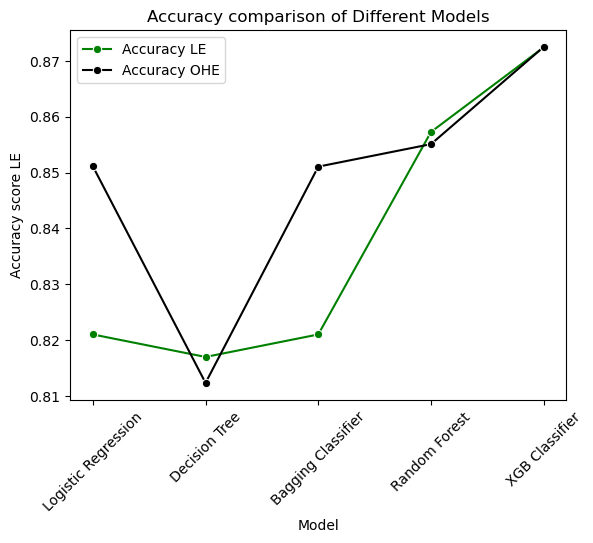

In [33]:
sns.lineplot(x='Model',y='Accuracy score LE',data=metric_comparison,color='green',
             marker='o',label='Accuracy LE')
sns.lineplot(x='Model',y='Accuracy score OHE',data=metric_comparison,color='black',
             marker='o',label='Accuracy OHE')
plt.xticks(rotation=45)
plt.title('Accuracy comparison of Different Models')
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

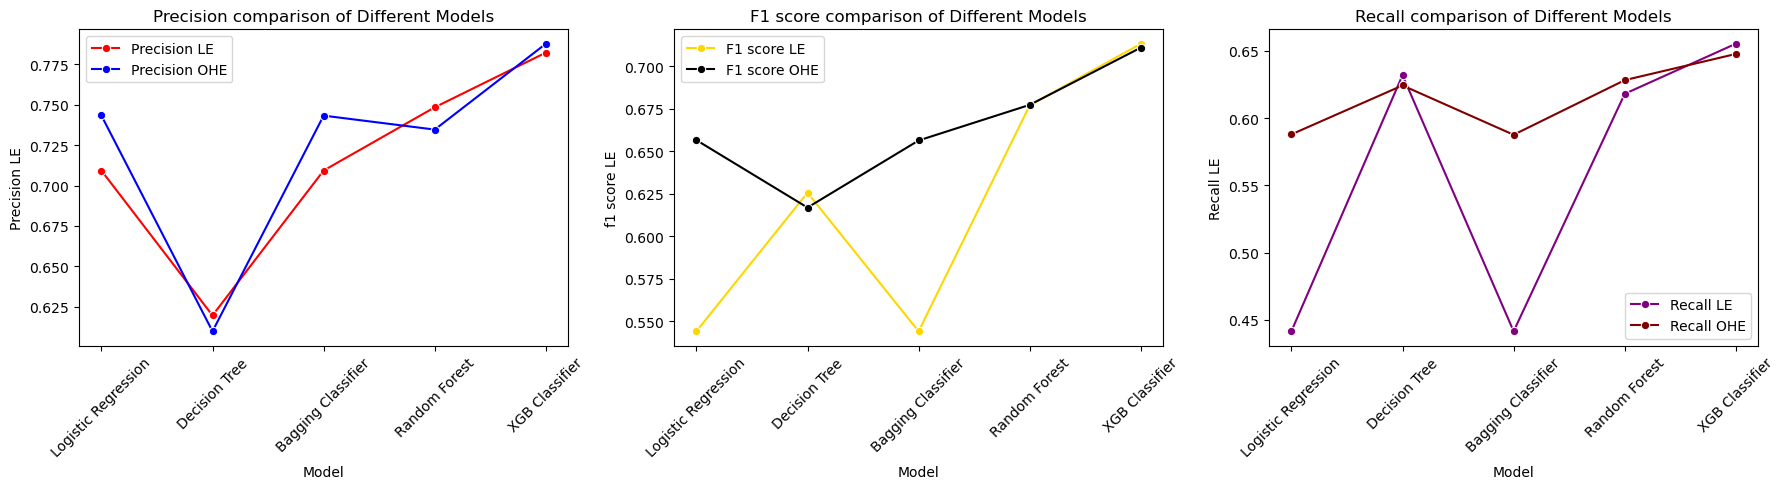

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
fig.subplots_adjust(wspace=0.3) 

# Precision comparison
sns.lineplot(x='Model', y='Precision LE', data=metric_comparison, color='red', 
             marker='o', label='Precision LE', ax=axes[0])
sns.lineplot(x='Model', y='Precision OHE', data=metric_comparison, color='blue', 
             marker='o', label='Precision OHE', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Precision comparison of Different Models')
axes[0].legend()

# F1 score comparison
sns.lineplot(x='Model', y='f1 score LE', data=metric_comparison, color='gold', 
             marker='o', label='F1 score LE', ax=axes[1])
sns.lineplot(x='Model', y='f1 score OHE', data=metric_comparison, color='black', 
             marker='o', label='F1 score OHE', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('F1 score comparison of Different Models')
axes[1].legend()

# Recall comparison
sns.lineplot(x='Model', y='Recall LE', data=metric_comparison, color='purple', 
             marker='o', label='Recall LE', ax=axes[2])
sns.lineplot(x='Model', y='Recall OHE', data=metric_comparison, color='maroon', 
             marker='o', label='Recall OHE', ax=axes[2])
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_title('Recall comparison of Different Models')
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()